___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset") 

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
X_train[7].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

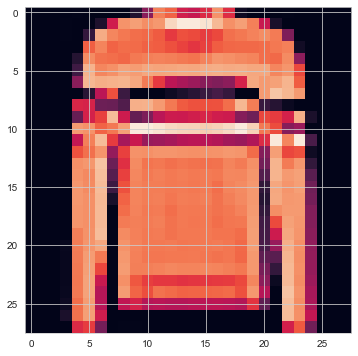

In [9]:
plt.imshow(X_train[5])

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train[5]

2

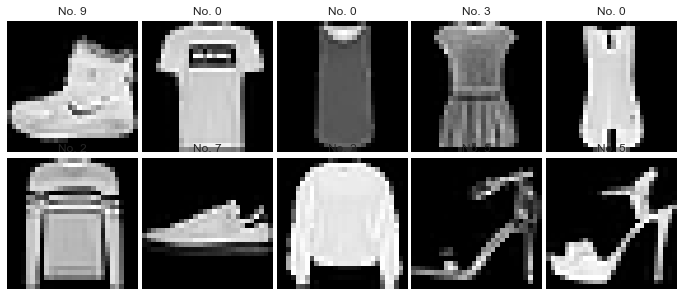

In [12]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [17]:
y_train[0]

9

In [18]:
classes[y_train[0]]

'Ankle boot'

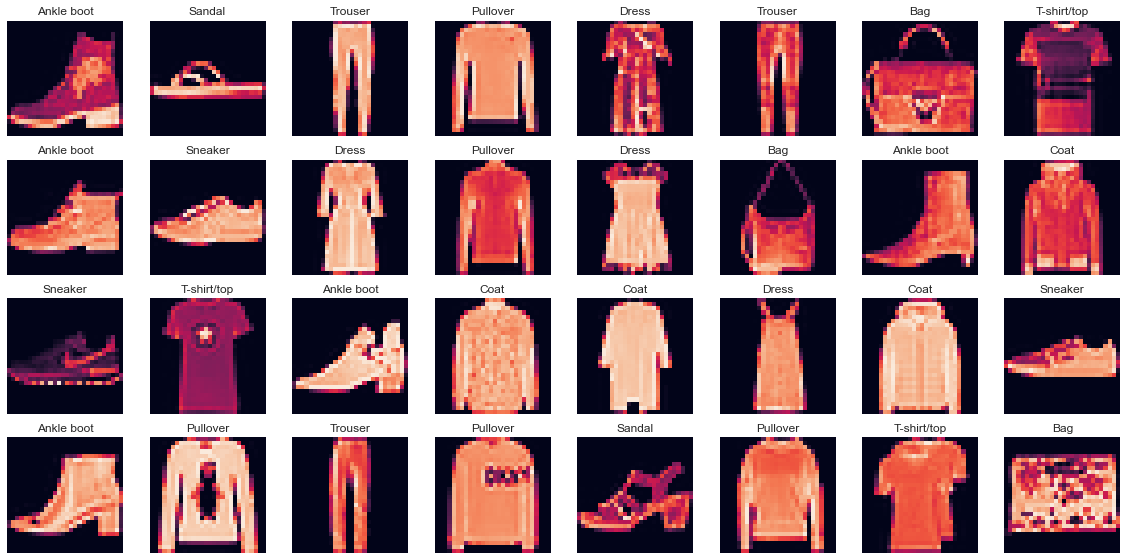

In [19]:
plt.figure(figsize=(20, 20))
for i in range(32):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
X_train[9].min()

0

In [21]:
X_train[9].max()

255

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[9].min()

0.0

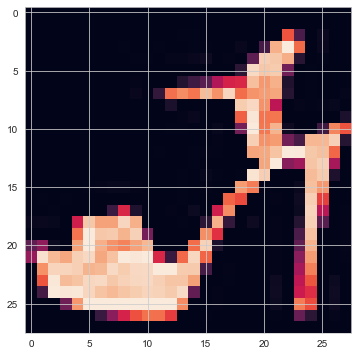

In [24]:
plt.imshow(X_train[9])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [27]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)                    
Y_test.shape

(10000, 10)

In [33]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
y_train[0]

9

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [43]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu',  padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
   

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1372)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [46]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4353 - accuracy: 0.8425 - val_loss: 0.3520 - val_accuracy: 0.8761
Epoch 2/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2817 - accuracy: 0.8985 - val_loss: 0.3050 - val_accuracy: 0.8847
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2448 - accuracy: 0.9118 - val_loss: 0.2753 - val_accuracy: 0.9052
Epoch 4/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2243 - accuracy: 0.9188 - val_loss: 0.2826 - val_accuracy: 0.9080
Epoch 5/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2127 - accuracy: 0.9232 - val_loss: 0.2800 - val_accuracy: 0.8996


In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.435,0.842,0.352,0.876
1,0.282,0.898,0.305,0.885
2,0.245,0.912,0.275,0.905
3,0.224,0.919,0.283,0.908
4,0.213,0.923,0.280,0.900


**TASK 7: Plot values of metrics you used in your model.**

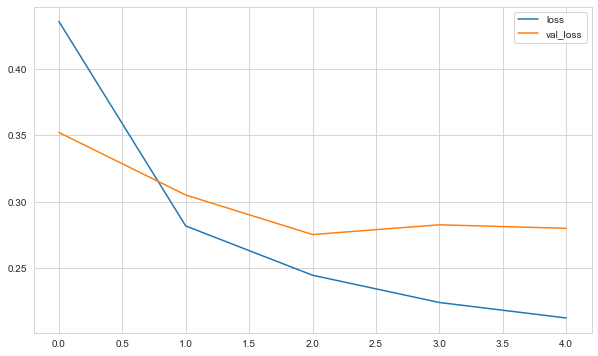

In [49]:
summary[["loss", "val_loss"]].plot();

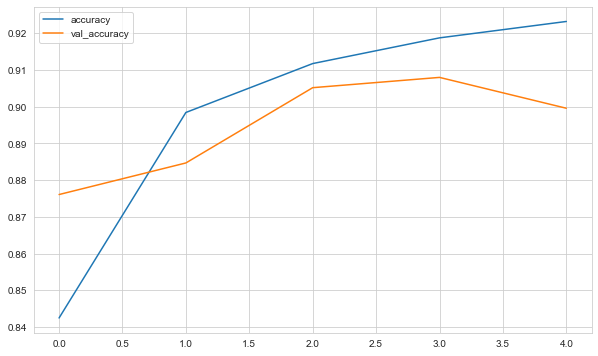

In [50]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2753 - accuracy: 0.9052


[0.27532774209976196, 0.9052000045776367]

In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27532774209976196
Test accuracy: 0.9052000045776367


In [54]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [55]:
y_pred = np.argmax(pred_prob, axis=1)

In [56]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.92      0.79      0.85      1000
           3       0.86      0.94      0.90      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.69      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [58]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [59]:
print(confusion_matrix(y_test, y_pred))

[[894   2   4  41   4   1  49   0   5   0]
 [  0 987   0  12   0   0   0   0   1   0]
 [ 24   1 793  13  82   0  84   0   3   0]
 [ 11   8   2 945  14   0  18   0   2   0]
 [  2   3  21  34 848   0  90   0   2   0]
 [  0   0   0   1   0 975   0  20   0   4]
 [172   3  40  42  48   0 688   0   7   0]
 [  0   0   0   0   0   6   0 982   0  12]
 [  1   2   0   5   1   3   1   3 984   0]
 [  1   0   0   0   0   5   0  38   0 956]]


<AxesSubplot:>

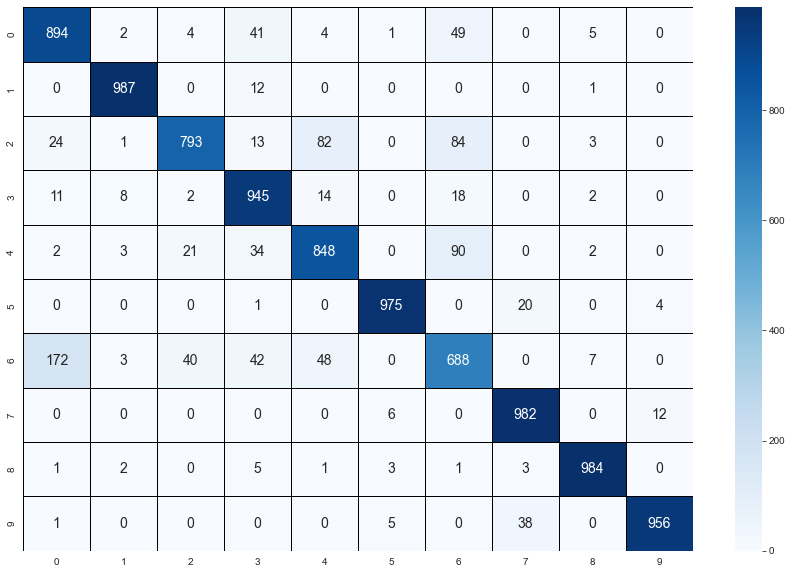

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [61]:
my_image = X_test[44]

In [62]:
my_image.shape

(28, 28, 1)

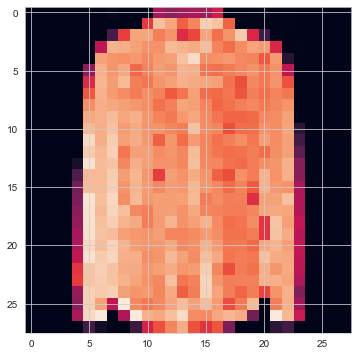

In [63]:
plt.imshow(my_image.reshape(28,28));

In [64]:
image_prediction = model.predict(my_image.reshape(1,28, 28, 1))

1/1 [==============================] - 0s 26ms/step


In [65]:
image_prediction

array([[5.1354735e-05, 4.0619955e-08, 3.1111069e-04, 3.4912311e-05,
        5.1925614e-02, 1.4448224e-05, 9.4762683e-01, 7.9076772e-06,
        2.2838565e-05, 4.9381215e-06]], dtype=float32)

In [66]:
np.argmax(image_prediction, axis=1)

array([6], dtype=int64)

In [67]:
result=np.argmax(image_prediction, axis=1)

In [68]:
result

array([6], dtype=int64)

In [69]:
classes[int(result)]

'Shirt'

In [70]:
#model.save("cnn-ass-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___